In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'E:\Santander Recommendation\train_ver2.csv')

C:\Users\liamc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.fecha_dato =pd.to_datetime(train['fecha_dato'])

In [2]:
test = pd.read_csv(r'E:\Santander Recommendation\test_ver2.csv')

C:\Users\liamc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
samplesubmission = pd.read_csv(r'E:\Santander Recommendation\sample_submission.csv')

In [3]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [63]:
train.ncodpers.nunique()

956645

In [5]:
train.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
train.describe(include=['object'])

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [68]:
testusers= pd.DataFrame(test.ncodpers)

In [69]:
overlap = pd.merge(train,testusers,how='inner',on='ncodpers')

In [71]:
overlap.ncodpers.nunique()

929615

In [72]:
test.ncodpers.nunique()

929615

In [74]:
overlap = []

In [57]:
train.groupby(['fecha_dato']).groups.keys()

dict_keys(['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28'])

In [29]:
custovertime = train.groupby(['fecha_dato']).agg('count')

In [30]:
custovertime = custovertime.filter(['fecha_dato','ncodpers'],axis=1)

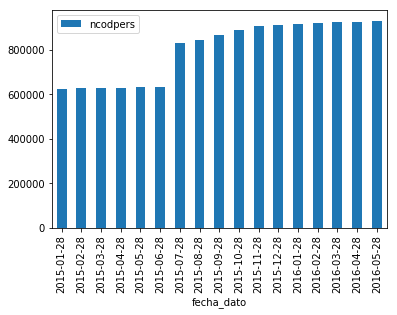

In [31]:
custovertime.plot(kind='bar')

In [17]:
prodsovertime = train.groupby(['fecha_dato']).agg('sum')

In [18]:
prodsovertime = prodsovertime.filter(['ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'], axis=1) 

In [19]:
prodsovertime

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
fecha_dato,,,,,,,,,,,,,,,,,,,,,
2015-01-28,88,19,487855,301,58763,7757,8418,106471,36195,1513,...,5007,7430,2349,38288,35613,20263,3234,38995.0,43331.0,95601
2015-02-28,89,20,488658,301,60028,7690,8228,106043,36040,2055,...,4998,7407,2344,38507,34352,20198,3219,40746.0,44810.0,94543
2015-03-28,89,21,489074,315,60929,7674,7875,105688,35847,2396,...,4988,7384,2340,38727,34990,20020,3196,42967.0,44109.0,97211
2015-04-28,87,21,489069,313,62221,7653,7482,105167,35650,2439,...,4968,7370,2346,39603,35988,19939,3173,42443.0,46593.0,98312
2015-05-28,85,21,489737,313,63391,7647,7096,104947,35499,2075,...,4797,7363,2342,39946,35880,19955,3155,41383.0,42458.0,96487
2015-06-28,83,21,494027,316,59845,7596,6920,104602,35342,1803,...,4721,7363,2040,42888,36550,19675,3138,43524.0,47703.0,98655
2015-07-28,82,19,503903,320,61607,7582,6939,104288,35145,1845,...,4707,7345,2024,41779,37159,19699,3128,44937.0,49589.0,99981
2015-08-28,82,19,514827,323,62997,7556,6993,104053,35010,1909,...,4693,7346,2023,42021,36820,19949,3108,42788.0,47060.0,96045
2015-09-28,81,19,529608,319,63759,7521,7180,103680,34795,1982,...,4682,7343,2024,42267,36248,20155,3090,43673.0,47998.0,100726


In [24]:
#prodsovertime['fecha_dato'] = prodsovertime.index


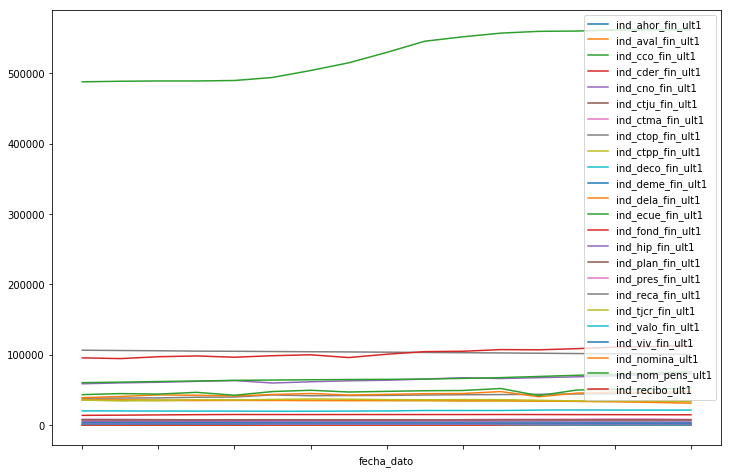

In [20]:
ax = prodsovertime.plot(figsize=(12,8))

In [29]:
train.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [3]:
nomprov = train.groupby(['nomprov']).agg('median')
provmedianincome = nomprov.filter(['nomprov','renta'],axis=1)
provmedianincome

,renta
nomprov,
ALAVA,96967.65
ALBACETE,78657.30
ALICANTE,67526.28
ALMERIA,73390.65
ASTURIAS,87199.38
AVILA,68561.28
BADAJOZ,62330.97
"BALEARS, ILLES",123573.51
BARCELONA,131214.48


In [4]:
provmedianincome =provmedianincome.sort_values(by=['renta'])

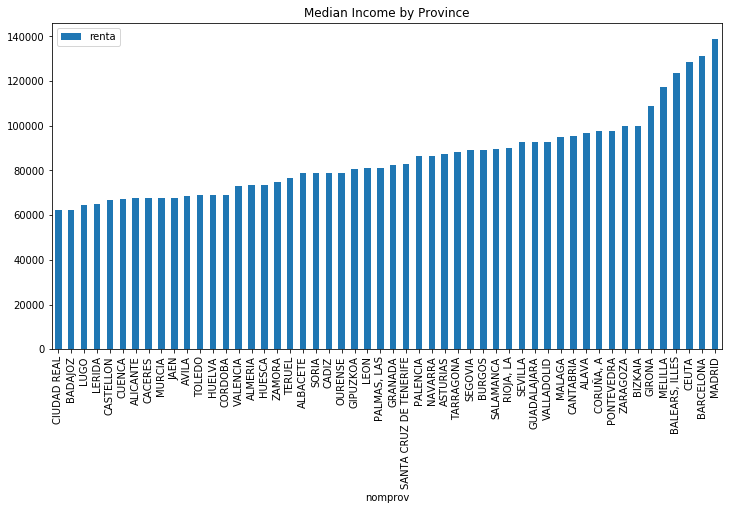

In [5]:
provmedianincome.plot(kind='bar',figsize=(12,6),title='Median Income by Province')

In [4]:
train = train.sort_values(by=['ncodpers','fecha_dato'])

In [5]:
train

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
416965,2015-01-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,1,0,0.0,0.0,0
836224,2015-02-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
1673961,2015-03-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
1882060,2015-04-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
3144382,2015-05-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,1,0,0.0,0.0,0
3565837,2015-06-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,1,0,0.0,0.0,0
4078996,2015-07-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,1,0,0.0,0.0,0
5319234,2015-08-28,15889,F,ES,V,56,1995-01-16,0.0,246,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
5705188,2015-09-28,15889,F,ES,V,56,1995-01-16,0.0,247,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
6973298,2015-10-28,15889,F,ES,V,56,1995-01-16,0.0,248,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0


In [6]:
pd.melt(train,id_vars='ncodpers',value_vars=['ind_ahor_fin_ult1'])

,ncodpers,variable,value
0,15889,ind_ahor_fin_ult1,0
1,15889,ind_ahor_fin_ult1,0
2,15889,ind_ahor_fin_ult1,0
3,15889,ind_ahor_fin_ult1,0
4,15889,ind_ahor_fin_ult1,0
5,15889,ind_ahor_fin_ult1,0
6,15889,ind_ahor_fin_ult1,0
7,15889,ind_ahor_fin_ult1,0
8,15889,ind_ahor_fin_ult1,0
9,15889,ind_ahor_fin_ult1,0


In [6]:
train.indrel_1mes.value_counts()

1.0    7277607
1.0    4017746
1      2195328
3.0       1804
3.0       1409
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: indrel_1mes, dtype: int64

In [7]:
train.nomprov.value_counts()

MADRID                    4409600
BARCELONA                 1275219
VALENCIA                   682304
SEVILLA                    605164
CORUÑA, A                  429322
MURCIA                     396759
MALAGA                     367023
ZARAGOZA                   342543
ALICANTE                   313397
CADIZ                      294684
PONTEVEDRA                 280026
ASTURIAS                   265749
VALLADOLID                 238259
PALMAS, LAS                235700
BADAJOZ                    192996
BIZKAIA                    185888
TOLEDO                     183067
GRANADA                    178562
SALAMANCA                  164238
CANTABRIA                  155706
CORDOBA                    144679
CACERES                    129912
BALEARS, ILLES             124933
HUELVA                     122283
CIUDAD REAL                119390
ALBACETE                   114128
CASTELLON                  104295
TARRAGONA                  100115
BURGOS                      97188
GIRONA        

In [8]:
train.renta.value_counts()

451931.22    5582
463625.16    1743
181042.20    1493
128318.52    1404
105260.88    1354
488798.49    1332
127141.50    1183
283325.67    1148
132335.73    1047
236690.34    1009
104563.80     954
227267.49     896
273387.54     886
111933.69     844
174407.10     823
227397.72     813
155930.43     804
218030.01     794
163432.47     712
208961.79     680
555605.55     677
168733.62     669
135522.15     657
148736.19     653
152601.99     649
248233.11     627
288997.44     625
326853.09     624
47550.39      607
91673.25      586
             ... 
31253.64        1
73367.82        1
46808.19        1
179561.43       1
108875.73       1
128959.86       1
39686.61        1
192297.42       1
74075.85        1
55041.57        1
65108.82        1
86106.78        1
144388.74       1
156827.52       1
80427.69        1
195859.59       1
97200.18        1
65845.32        1
130968.03       1
19559.37        1
147186.60       1
102417.57       1
79782.66        1
75676.77        1
238224.03 

In [9]:
train.segmento.value_counts()

02 - PARTICULARES     7960220
03 - UNIVERSITARIO    4935579
01 - TOP               562142
Name: segmento, dtype: int64

In [11]:
train.renta.groupby([train.segmento]).median()

segmento
01 - TOP              141562.68
02 - PARTICULARES     108013.65
03 - UNIVERSITARIO     88740.27
Name: renta, dtype: float64

In [12]:
train.sexo.value_counts()

V    7424252
H    6195253
Name: sexo, dtype: int64

In [13]:
train.ind_nomina_ult1.value_counts()

0.0    12885285
1.0      745961
Name: ind_nomina_ult1, dtype: int64

In [14]:
train.ult_fec_cli_1t.value_counts()

2015-12-24    763
2015-12-28    521
2015-07-09    443
2015-07-06    405
2015-07-01    401
2015-07-21    391
2015-07-07    340
2015-07-17    330
2015-07-10    320
2015-07-28    311
2015-07-24    299
2015-07-20    295
2015-07-22    275
2015-07-15    273
2015-07-03    262
2015-07-29    255
2015-07-13    229
2015-07-30    224
2015-12-21    206
2015-07-23    206
2015-07-27    203
2015-07-14    196
2015-07-08    175
2015-12-17    172
2016-01-19    169
2016-01-05    167
2015-07-02    166
2015-12-16    158
2015-07-16    147
2015-12-18    139
             ... 
2016-02-25     65
2015-12-07     64
2016-02-18     64
2015-08-25     63
2016-04-20     63
2016-04-22     62
2015-08-12     62
2015-09-03     61
2015-08-21     61
2016-05-05     61
2015-08-24     61
2015-11-26     61
2015-08-07     59
2016-03-03     59
2015-08-20     59
2015-08-18     59
2016-04-07     58
2015-09-21     57
2016-04-14     57
2016-03-07     55
2016-05-13     55
2015-11-06     54
2015-08-14     51
2016-03-24     49
2016-03-23

In [15]:
train.antiguedad.value_counts()

0          134335
1          130681
12         130589
3          125789
2          125133
5          122246
     21    118544
4          117501
14         112959
     12    112571
6          111329
17         109770
16         109440
7          109156
15         108838
13         107487
24         104439
10         104434
18         104287
26         103378
     10    101731
25          99037
8           98171
27          96927
28          96575
23          96281
21          96251
19          96000
     33     95100
38          93861
            ...  
    238      2948
    215      2904
    228      2876
    203      2510
    236      2378
248          2271
    230      2258
    241      1980
    226      1967
      1      1898
    233      1863
    240      1854
249          1777
250          1512
    227      1356
    242      1148
251          1071
    239       872
    243       713
252           676
    246       507
    244       450
253           416
    245       360
254       

In [28]:
train.age.value_counts()

23     542682
24     527526
22     524620
21     500941
20     370847
25     345664
26     250641
 23    237202
43     231501
44     229359
42     227626
45     224073
41     221432
46     214320
 22    211694
 24    207259
40     205668
47     204715
27     203881
48     194513
39     186583
49     179384
 21    175047
28     174169
50     169287
38     166836
51     159013
37     154889
52     152009
29     149706
        ...  
107       439
103       419
  3       415
108       384
105       307
104       307
110       218
109       205
111       203
106       192
107       155
112       140
  2       130
113        93
108        72
109        60
116        51
111        49
112        48
115        43
110        43
115        39
113        24
114        22
117        14
116        12
163         8
127         8
164         3
126         3
Name: age, Length: 235, dtype: int64

In [21]:
train.age = pd.to_numeric(train.age,errors='coerce')

In [25]:
train.age = train.age.fillna(train.age.median)

Text(0,0.5,'Count')

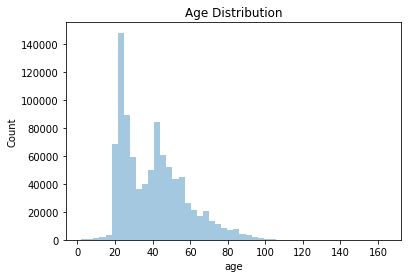

In [5]:
sns.distplot(test.age.dropna(),kde=False)    
plt.title("Age Distribution")
plt.ylabel("Count")

In [6]:
months = train.fecha_dato.unique()

In [7]:
train_wnewproducts = pd.DataFrame()

In [8]:
i = 1
while i < len(months):
    #select sequential months
    new_month = train[train.fecha_dato == months[i]]
    prev_month = train[train.fecha_dato == months[i-1]]
    #select only customers present in both month
    new_month = new_month.loc[new_month['ncodpers'].isin(prev_month.ncodpers)]
    prev_month = prev_month.loc[prev_month['ncodpers'].isin(new_month.ncodpers)]
    #sort by customer id so both months will be ordered the same
    new_month.sort_values(by = 'ncodpers', inplace = True)
    prev_month.sort_values(by = 'ncodpers', inplace = True)
    #pick out product columns
    product_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1',
                'ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1',
                'ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_dela_fin_ult1','ind_deme_fin_ult1',
                'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_nom_pens_ult1',
                'ind_nomina_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
                'ind_recibo_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1']
    #new dataframe with just product
    new_month_products = new_month[product_cols]
    #add in the corresponding customer ids
    new_month_products['ncodpers'] = new_month.ncodpers
    #get rid of index
    new_month_products.reset_index(drop=True,inplace=True)
    #now repeat for the previous month but make ids zero so a subtraction works 
    prev_month_products = prev_month[product_cols]
    prev_month_products['ncodpers'] = prev_month.ncodpers
    prev_month_products.ncodpers = 0
    prev_month_products.reset_index(drop=True,inplace=True)
    #subtract to find the new products
    new_products = new_month_products.subtract(prev_month_products)
    #remove products that the customer dropped fill NA's
    new_products[new_products < 0] = 0
    new_products = new_products.fillna(0)
    #merge the new products features with the month data
    new_products = new_products.merge(new_month.ix[:,0:24], on='ncodpers')
    #add the interated months into training dataframe
    train_wnewproducts = pd.concat([train_wnewproducts,new_products], axis = 0)
    print("progress = ", float(i/len(months)))
    i += 1
    

C:\Users\liamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\liamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\liamc\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

progress =  0.058823529411764705
progress =  0.11764705882352941
progress =  0.17647058823529413
progress =  0.23529411764705882
progress =  0.29411764705882354
progress =  0.35294117647058826
progress =  0.4117647058823529
progress =  0.47058823529411764
progress =  0.5294117647058824
progress =  0.5882352941176471
progress =  0.6470588235294118
progress =  0.7058823529411765
progress =  0.7647058823529411
progress =  0.8235294117647058
progress =  0.8823529411764706
progress =  0.9411764705882353


In [14]:
#get only rows that have a new product
train_wnewproducts = train_wnewproducts.loc[(train_wnewproducts.ix[:,0:24] != 0).any(axis=1)]

C:\Users\liamc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [17]:
train_wnewproducts.columns

Index(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_dela_fin_ult1', 'ind_deme_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_recibo_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ncodpers', 'fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento'],
      dtype='object')

[Text(0,0,'1'),
 Text(0,0,'2015-02-28'),
 Text(0,0,'2015-04-28'),
 Text(0,0,'2015-06-28'),
 Text(0,0,'2015-08-28'),
 Text(0,0,'2015-10-28'),
 Text(0,0,'2015-12-28'),
 Text(0,0,'2016-02-28'),
 Text(0,0,'2016-04-28')]

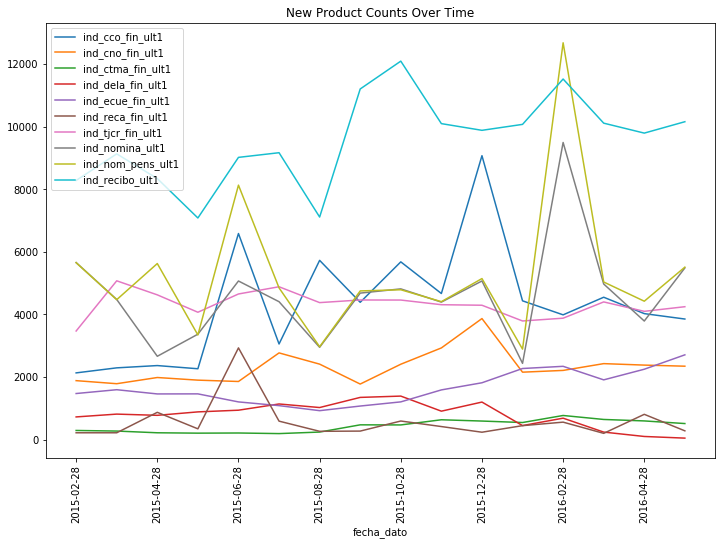

In [71]:
newprodsovertime = train_wnewproducts.groupby(['fecha_dato']).agg('sum')
newprodsovertime = newprodsovertime.filter([
        'ind_cco_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctma_fin_ult1',
        
        'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       
        'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
        'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'], axis=1) 
ax = newprodsovertime.plot(figsize=(12,8),title='New Product Counts Over Time',colormap='tab10')
ax.set_xticklabels(wsx,rotation=90)

In [69]:
qaz = list(newprodsovertime.index)
wsx = [1] + qaz[0::2]

In [70]:
wsx

[1,
 '2015-02-28',
 '2015-04-28',
 '2015-06-28',
 '2015-08-28',
 '2015-10-28',
 '2015-12-28',
 '2016-02-28',
 '2016-04-28']